In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [19]:
besra_results = []
comal_results = []
coreset_results = []
kmeans_results = []
lc_results = []
mc_results = []
random_results = []

for i in range (1, 6):
    besra_results.append(pd.read_csv(f"../metrics/netifier-besra-{i}-results.csv"))
    comal_results.append(pd.read_csv(f"../metrics/netifier-comal-{i}-results.csv"))
    coreset_results.append(pd.read_csv(f"../metrics/netifier-coreset-{i}-results.csv"))
    kmeans_results.append(pd.read_csv(f"../metrics/netifier-kmeans-{i}-results.csv"))
    lc_results.append(pd.read_csv(f"../metrics/netifier-lc-{i}-results.csv"))
    mc_results.append(pd.read_csv(f"../metrics/netifier-mc-{i}-results.csv"))
    random_results.append(pd.read_csv(f"../metrics/netifier-random-{i}-results.csv"))

In [34]:
def average_results(results):
    return pd.concat(results).groupby(level=0).mean()

def plot_results(lc, mc, kmeans, coreset, comal, besra, random, passive, threshold, key):
    data_used = [math.ceil(x / 7773 * 100) for x in lc['Data Used']]
    plt.figure(figsize=(12, 8))
    plt.plot(data_used, lc[key], label='LC', marker='o')
    plt.plot(data_used, mc[key], label='MC', marker='o')
    plt.plot(data_used, kmeans[key], label='KMeans', marker='o')
    plt.plot(data_used, coreset[key], label='Coreset', marker='o')
    plt.plot(data_used, comal[key], label='CoMAL', marker='o')
    plt.plot(data_used, besra[key], label='BESRA', marker='o')
    plt.plot(data_used, random[key], label='Random', marker='o')
    plt.plot(data_used, passive[key], label='Passive', linestyle='--', color='black')
    plt.plot(data_used, threshold[key], label='Threshold', linestyle='--', color='gray')
    plt.xlabel('Data Used')
    plt.ylabel(key)
    plt.xticks(data_used)
    plt.legend()

    plt.show()

In [21]:
besra_results = average_results(besra_results)
comal_results = average_results(comal_results)
coreset_results = average_results(coreset_results)
kmeans_results = average_results(kmeans_results)
lc_results = average_results(lc_results)
mc_results = average_results(mc_results)
random_results = average_results(random_results)

In [30]:
passive_result = pd.DataFrame({
    'Accuracy': [0.90368 for i in range(len(lc_results))],
    'F1 Micro': [0.78166 for i in range(len(lc_results))],
    'F1 Macro': [0.7787 for i in range(len(lc_results))],
})

threshold_result = pd.DataFrame({
    'Accuracy': [0.90368-0.02 for i in range(len(lc_results))],
    'F1 Micro': [0.78166-0.02 for i in range(len(lc_results))],
    'F1 Macro': [0.7787-0.02 for i in range(len(lc_results))],
})

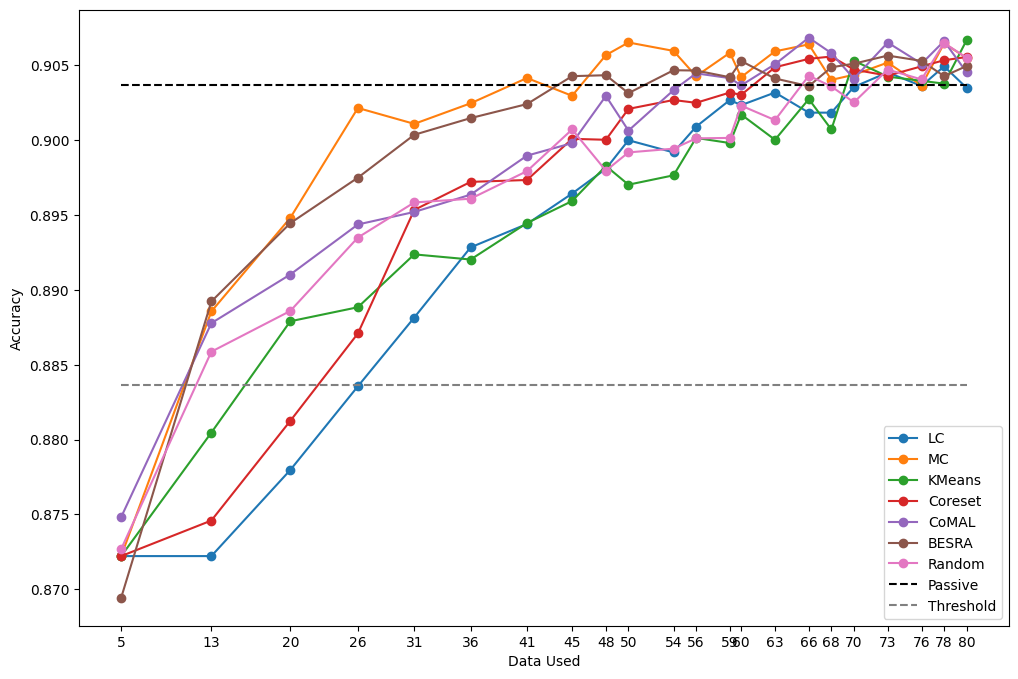

In [35]:
plot_results(lc_results, mc_results, kmeans_results, coreset_results, comal_results, besra_results, random_results, passive_result, threshold_result, 'Accuracy')

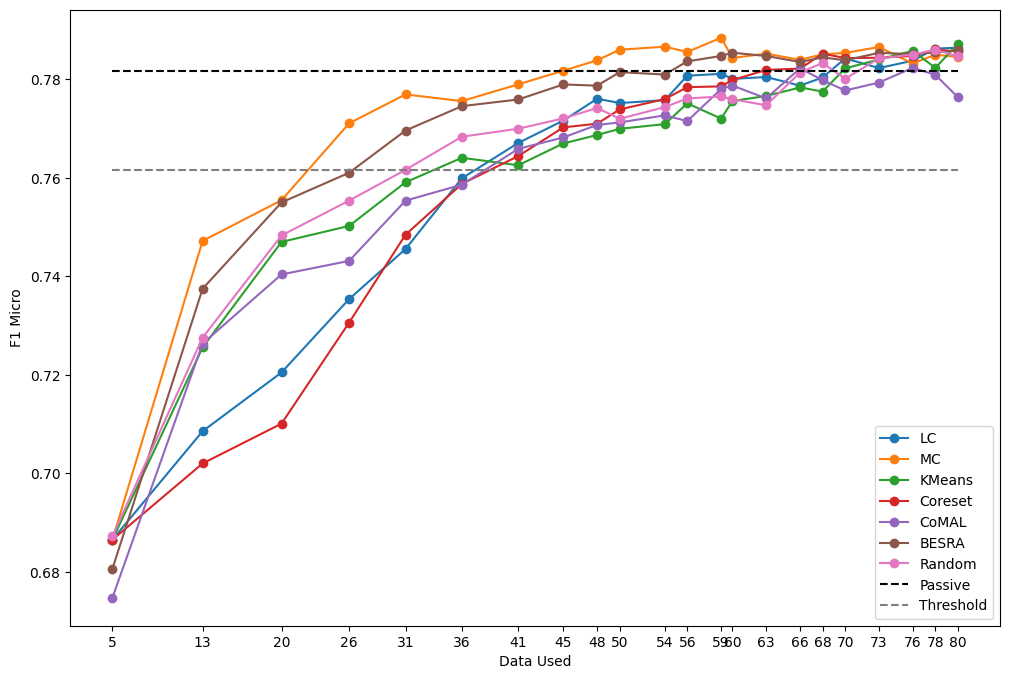

In [36]:
plot_results(lc_results, mc_results, kmeans_results, coreset_results, comal_results, besra_results, random_results, passive_result, threshold_result, 'F1 Micro')

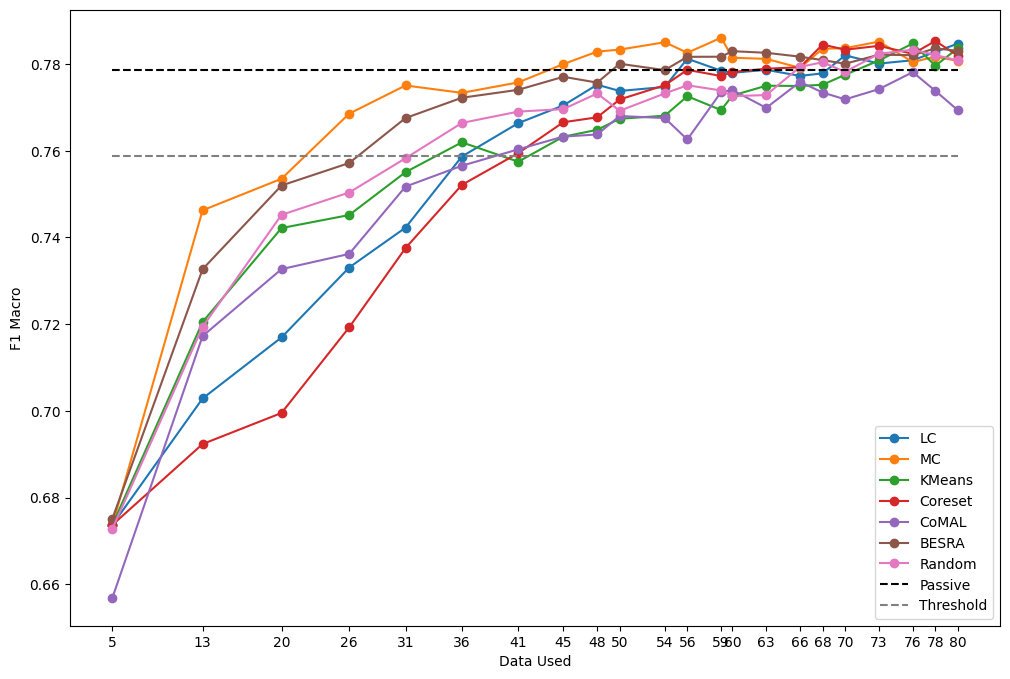

In [37]:
plot_results(lc_results, mc_results, kmeans_results, coreset_results, comal_results, besra_results, random_results, passive_result, threshold_result, 'F1 Macro')